#Absorptive loss and band non-parabolicity as a physical origin of large nonlinearity in epsilon-near-zero materials

## Epsillon-Near-Zero Materials
Materials exhibiting very small dielectric permittivity, or epsilon-near-zero (ENZ) materials, belong to the family of media able to affect electromagnetic radiation in a very unconventional way. They allow the electromagnetic field to be manipulated down to its finest details, and it can be put to work to achieve a number of different functionalities. Some key features of ENZ materials are:

1.  Medium effective wavelength  in these media is much larger than the vacuum wavelength so that they host a regime where both field amplitude and phase are slowly-varying over relatively large portions of the bulk
1. They operate in a spectral region where |Re{ε}| < 1 .
2. They have high degree of electric field confinement
3. They demonstrate exceptional properties from large refractive index tuning, enhanced harmonic generation, and near-unity generation of phase conjugate waves.

The enhancement of nonlinearity is related to the dielectric constant
 			$$n = ε^{1/2} $$ or,$$	δn ∼ δε/2n$$
Therefore, when the permittivity is reduced, a small change results in a large change in refractive index and phase velocity. 

The change of dielectric constant is given by $δε ∼ χ(3)E^{2} $
where χ(3) is third-order nonlinear susceptibility,

 At the same time, the electric field is related to the intensity of light I as
 $I = nE^{2} /2η_{0}$ where $η_{0}$ is the vacuum impedance.

Therefore, the overall optically induced index change becomes 
$δn ∼ (χ(3)η_{0}/n^{2} )I ∼ n^{2}I$ 

With these points in mind, we can consider the enhancement of nonlinearity in ENZ having two factors – intrinsic (or material) $χ^(3)$, and extrinsic $1/n^{2}$.




##Band Structure Calculation

The conduction band of aluminium-doped zinc oxide is studied for calculations. It is found that a hyperbolic curve can be used to describe the energy-momentum relationship. 
$$\frac{(E-a)^2}{a^2}-\frac{k^2}{b^2}=1$$
or, $$E=\sqrt{a^2+a^2k^2/b^2}-a$$

The parameters $a=1.35eV$ and $b=0.211\AA^{-1}$ are used to define the hyperbola. This is found to fit the AZO band structure much better than the conventional parabolic band structure $E=\frac{\hbar^2k^2}{2m^*}$ within the range of $ 0 ≤ E<2.5eV$

The two fits are compared in this plot below
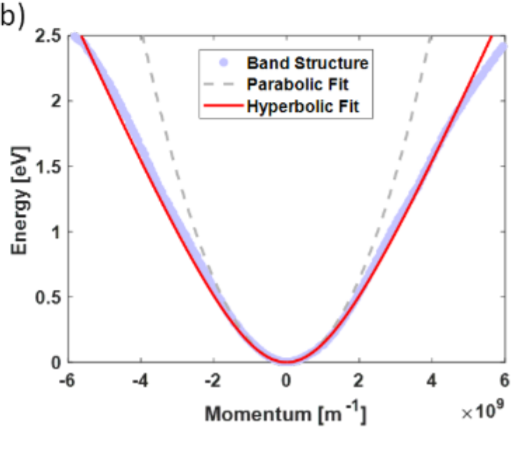

The following code replicates the given plot by calculating parabolic and hyperbolic band energies

Text(0, 0.5, 'Energy (eV)')

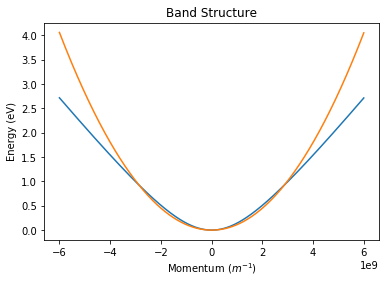

In [193]:
import numpy as np
import matplotlib.pyplot as plt

h=6.58e-16
a=1.35
b=0.211e10

mavg=1.918463484e-12

def E(k):     #MOMENTUM DEPENDENT ENERGY FUNCTION
    return np.sqrt(a*a+a*a*k*k/(b*b))-a

x=[i*6e6 for i in range(-1000,1000)]
y=[E(i) for i in x]               #HYPERBOLIC FIT
z=[h*h/(2*mavg)*i**2 for i in x]  #PARABOLIC FIT


plt.plot(x,y)
plt.plot(x,z)
plt.title("Band Structure")
plt.xlabel("Momentum ($m^{-1}$)")
plt.ylabel("Energy (eV)")

From the above band structure calculations , we can also calculate the density of states as a function of energy
$$\rho(E)=\frac{b^{3}}{\pi^{2} a^{3}} \sqrt{(E+a)^{2}-a^{2}}(E+a)$$

The code below calculates the density of states function. 

Text(0.5, 1.0, 'Density of states')

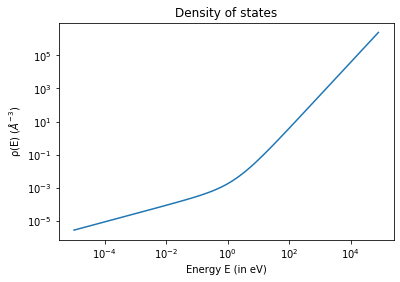

In [194]:
import numpy as np
import matplotlib.pyplot as plt

a=1.35
b=0.211

h=6.582e-16 #REDUCED PLANKS CONSTANT IN EV

def DOS(E):
    return ((b**3)/(((np.pi)**2)*a**3))*np.sqrt((E+a)**2-a*a)*(E+a)


x=[10**(i) for i in np.arange(-5,5,1/10)]
y=[DOS(i) for i in x]
plt.plot(x,y)
plt.xlabel("Energy E (in eV)")
plt.ylabel("ρ(E) ($\AA ^{-3}$)")
plt.xscale('log')
plt.yscale('log')
plt.title("Density of states")

##Momentum Dependent Effective Mass

The conventional definition of effective mass for a material with perfectly parabolic band structure is the radius of curvature of k-space:
$$m^{*}(k)=\hbar^{2}\left(\partial^{2} E / \partial k^{2}\right)^{-1}$$
For a perfectly linear band structure, the transport dependent effective mass is given as:
$$m^{*}(k)=\hbar^{2}k\left(\partial E / \partial k\right)^{-1}$$


In case of ENZ materials like ZnO, the band structure is hyperbolic, so it simplifies to the first description in
the case of a perfectly parabolic band, and to the latter in the case of a perfectly linear band. The momentum dependent effective mass is given as the weighted average of the two cases.
$$m^{*}(k)=\hbar\left[\frac{2}{3} \frac{v(k)}{k}+\frac{1}{3} \frac{d v(k)}{d k}\right]^{-1}$$

This can be expressed in terms of energy by substituting from the previous relation

$$m^{*}(E)=\left[\frac{2}{3} \frac{a^{2}}{\hbar^{2} b^{2}(E+a)}+\frac{1}{3} \frac{a^{4}}{\hbar^{2} b^{2}(E+a)^{3}}\right]^{-1}$$


Text(0.5, 1.0, 'Effective mass')

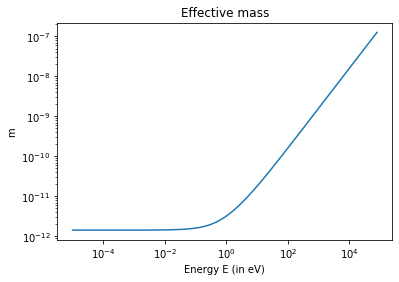

In [195]:
import numpy as np

h=6.582e-16
a=1.35
b=0.211e10

def m(E):
    return ((2/3)*(a**2)/(h*h*b*b*(E+a))+(1/3)*(a**4)/(h*h*b*b*(E+a)**3))**(-1)


x=[10**(i) for i in np.arange(-5,5,1/10)]
y=[m(i) for i in x]
plt.plot(x,y)
plt.xlabel("Energy E (in eV)")
plt.ylabel("m")
plt.xscale('log')
plt.yscale('log')
plt.title("Effective mass")

##Intensity Dependent Effective Mass

The effective mass of the electron sea can be calculated by averaging the effective mass of each electron $m(E)$ across all the energy states. The distribution is given by the Fermi-Dirac probability $f\left(E, \mu, T_{e}\right)$. 

$$m_{a v g}^{*}=\left[\frac{1}{N V} \sum_{l=1}^{n_{c a r}} \frac{1}{m^{*}\left(k_{l}\right)}\right]^{-1}$$
$$
\frac{1}{m_{\text {avg}}^{*}}=\frac{1}{N} \int \frac{f\left(E, \mu, T_{e}\right)}{m^{*}(E)} \rho(E) d E
$$
$$
f\left(E, \mu, T_{e}\right)=\left[\exp \left(\frac{E-\mu}{k_{B} T_{e}}\right)+1\right]^{-1}
$$
where $f\left(E, \mu, T_{e}\right)$ is the Fermi-Dirac distribution, N is the carrier concentration, and $\rho(E)$ is the density of states calculated earlier.

Now, on application of an external pump beam, energy is absorbed by free carriers through an intraband absorption process. This raises the kinetic energy and hence the electron temperature $T_{e}$. As the distribution
of carriers shifts to higher energy states, the average effective mass of the electron sea tends to
increase since the band is non-parabolic. This, in turn, causes a decrease in the plasma frequency and a corresponding
increase in dielectric constant.

The process relaxes as the energy of the hot electrons is transferred to the lattice with the characteristic electron-lattice relaxation time $\tau_{el}$. Hence, the strength of the process is determined by multiple factors:
1. Applied intensity
2. Absorbed energy
3. Band nonparabolicity
4. The dispersion in the index
can be modified by absorbing the energy of an optical pump through intraband absorption process. The chemical potential $\mu$ and the electron temperature $T_{e}$ are functions of applied pump intensity

The applied intensity can modify the the chemical potential $\mu$ and the electron temperature $T_{e}$. Hence the appropriate expression for the intensity dependent effective mass is:
$$
\frac{1}{m_{\text {avg}}^{*}(I)}=\int \frac{f\left(E, \mu(I), T_{e}(I)\right) E \rho(E)}{m^{*}(E)} d E
$$



#Dependence of refractive index on Wavelength

The optical response of the material under an applied field of arbitrary frequency is calculated by summing the induced
displacements for all electrons in the gas:.
$$
\varepsilon(\omega)=\varepsilon_{\infty}-\frac{q^{2}}{\varepsilon_{0}\left(\omega^{2}+i \omega \Gamma\right)} \frac{1}{V} \sum_{l=1}^{n_{c a r}} \frac{1}{m^{*}\left(k_{l}\right)}=\varepsilon_{\infty}-\frac{N q^{2}}{\varepsilon_{0}\left(\omega^{2}+i \omega \Gamma\right) m^{*} a v g}
$$

This the generalized Drude formula for non-parabolic bands, where $Γ$ is the scattering rate, l is an occupied state, and $n_{car}$ is the number of carriers in the volume V. The dependence on intensity comes from the change in average effective mass, hence the dependence of effective mass on intensity must be calculated first.

When an external pump is applied, for any given pump intensity, the distribution of carriers described through the Fermi-Dirac
probability can be found using conservation identities of charge and energy. Firstly, the total number of carriers in the band must remain constant 

$
\int f\left(E, \mu(I), T_{e}(I)\right) \rho(E) d E=N$


Secondly, the total change in energy of the electron gas must be equal to the absorbed energy from the pump

$
\int f\left(E, \mu(I), T_{e}(I)\right) E \rho(E) d E-\int f\left(E, \mu_{0}, T_{0}\right) E \rho(E) d E=\delta U_{a b s}=A I \tau / d
$
 ;    where $\mu_{0}$ and $T_{0}$ are the chemical potential and the electron temperature before pumping. $\tau$ is given by the electron relaxation time.



The above two conditions must be satisfied for any given intensity. Hence, the chemical potential and electron temperature can be unquely defined for any given intensity. This enables us to calculate the intensity dependent effective mass as discussed earlier:

$$
\frac{1}{m_{\text {avg}}^{*}(I)}=\int \frac{f\left(E, \mu(I), T_{e}(I)\right) E \rho(E)}{m^{*}(E)} d E
$$

The effective mass has been shown to vary linearly, increasing ~ 20% per $ TW/{cm}^2$ of applied pump intensity

Finally, we can calculate the the permittivity as a function of both $\omega$ and intensity

$$
\varepsilon(\omega, I)=\varepsilon_{\infty}-\frac{N q^{2}}{\varepsilon_{0} m^{*}_{avg}(I)} \frac{1}{\omega^{2}+i \omega \Gamma}
$$
$$\epsilon_{\infty}=\frac{N q^{2}}{\epsilon_{0} m^{*}_{avg}(0)\omega_{p}^2}$$
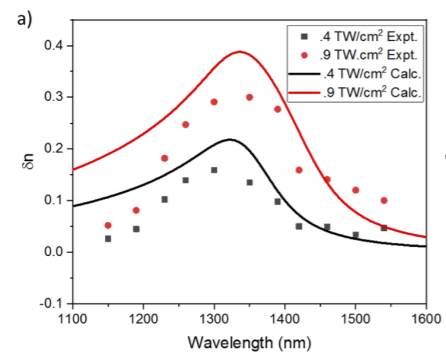
The given plot shows the frequency dependent refractive index for two different applied intensities: $0.4 TW/{cm}^2$ and $ 0.9 TW/{cm}^2$. The code below attempts to replicate the same curve.


Maxima of 0.4 occurs at  1101.4568517856624 nm
Maxima of 0.9 occurs at  1331.3550102950248 nm


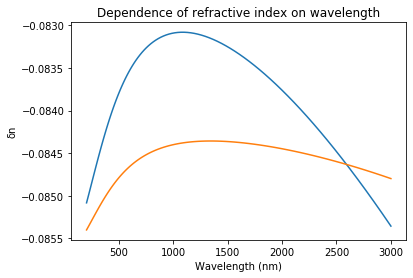

In [197]:
## import matplotlib.pyplot as plt
import numpy as np

wmin=2*np.pi*(3e8)/(3000e-9)
wmax=2*np.pi*(3e8)/(200e-9)
size=100


#CONSTANTS IN SI UNITS:
N=1e15
q=1.6e-19
e_0=8.85e-12


m0=1.9e-12*1.6e-29
T=2.145e15*2
wp=1.5*2.4e15
arr=[0]*size
lam=[0]*size
wl=[0]*size


def m(I):
    return m0*(1+I*20)    

def fun(w,I):
    den=complex(w*w,w*T)
    return ((N*q*q)/(e_0))*(1/(m(0)*wp**2)-1/(m(I)*den))

for i in range(size):
    wl[i]=wmin*(wmax/wmin)**(i/size)
    lam[i]=(3*10**8)*2*np.pi/(wl[i])*1e9           #in nm

for i in range(size):
    arr[i]=np.sqrt(e_inf)-np.sqrt(fun(wl[i],0.4))

arr2=[0]*size
for i in range(size):
    arr2[i]=np.sqrt(e_inf)-np.sqrt(fun(wl[i],0.9))
    
plt.plot(lam,arr)
plt.plot(lam,arr2)
plt.xlabel("Wavelength (nm)")
plt.ylabel("δn")
plt.title("Dependence of refractive index on wavelength")

print("Maxima of 0.4 occurs at ",lam[arr.index(max(arr))],"nm")
print("Maxima of 0.9 occurs at ",lam[arr2.index(max(arr2))],"nm")

The results of the simulation show a similar trend as the given plots and the maxima occur at 1101nm and 1331 nm which are close to the results in the paper. However, the precise nature of the curve couldnot be replicated. This is because the given information was not sufficient to calculate the intenisty dependent parameters $\mu(I)$ and $T_{e}(I)$. Instead, an empirical relation had to be used in order to calculate the intensity dependence of these two terms.


#Dependence of Refractive Index on Intensity
When pump intensity is increased, the average effective mass increases as discussed earlier. This causes a change in the material permittivity and hence the refractive index as shown in the figure. The plot is obtained at the wavelength in which maximum index change is observed
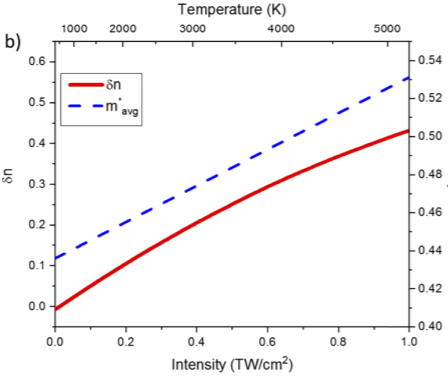
The same function can be used to simulate the variation of refractive index with applied intensity. In the following code, the intensity of the applied beam has been varied from 0 to 1 $TW/{cm}^{2}$ and the change in refractive index has been observed. The wavelength has been kept constant at 1100nm, which is close to the maxima obtained for index change in the previous section. 

Text(0.5, 1.0, 'Dependence of Refractive Index on Applied Intensity')

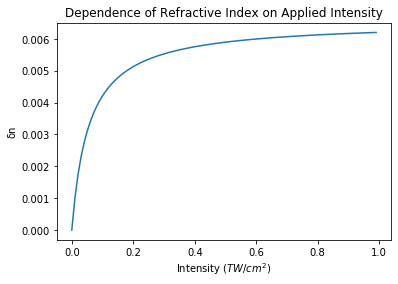

In [171]:
N=1e15
q=1.6e-19
e_0=8.85e-12
m0=1.9e-12*1.6e-29#2.36e-31
T=2.145e15*2

arr=[0]*size
lam=[0]*size
wl=[0]*size
mavg=m0*0.44


e_inf=(N*q*q)/(e_0*mavg*wp**2)

def m(I):
    return m0*(1+I*20)    

def fun(w,I):
    den=complex(w*w,w*T)
    return ((N*q*q)/(e_0))*(1/(m(0)*wp**2)-1/(m(I)*den))


wcon=2*np.pi*(3e8)/(1100e-9)     #CONSTANT WAVELENGTH

x=[i/100 for i in range(100)]
y=[np.sqrt(fun(wcon,i))-np.sqrt(fun(wcon,0)) for i in x]

plt.plot(x,y)
plt.xlabel("Intensity ($TW/{cm}^{2}$)")
plt.ylabel("δn")
plt.title("Dependence of Refractive Index on Applied Intensity")

A general increasing trend is observed between refractive index and applied intensity, whiuch is similar to the given plot. However, the exact nature has not been replicated due to the lack of sufficient information on  $\mu(I)$ and $T_{e}(I)$ as discussed earlier.

#Figure of Merit

The three performance metrics for the intraband effect to be most efficient are, 1) absorption, 2) band non-parabolicity, and 3) index dispersion, which can construct a material figure of merit for optically induced index changes.

1. If a material can absorb more of the incident pump energy, a larger modification to the electron distribution within the conduction band will occur.
2. Materials with a larger initial effective mass require an increased modulation to produce the same shift in the permittivity, therefore its imperative to include the change in the normalized effective mass $\frac{1}{m_{\text {avg}}^{*}} \frac{d m^{*}}{d E}$ into the FOM. 
3. The change in the effective mass is also dependent on the sensitivity of the material to a change in effectiive mass $\frac{d n_{probe}}{d m_{avg}}$. The average effective mass shifts the plasma frequency of the material, such that materials with an increased index dispersion at the probe wavelength (typically in the ENZ region) will be optimal. For any material, there is an optimum loss value that balances the necessary absorption with reflection, in contrast to a Kerr nonlinearity where reduced loss is always favored. More electrons must undergo an interband transition (i.e. more pump energy must be absorbed) to produce the same shift in permittivity, leading to a factor 1/N.


Using the above factors, we can define a figure of merit which can be used to evaluate a material's intrinsic performance with regard to intraband nonlinearities.
$$
F O M=A_{\text {pump}}\left[\frac{1}{m_{\text {avg}}^{*}} \frac{d m^{*}}{d E}\right]\left[\frac{1}{N} \frac{d n_{\text {probe}}}{d m_{\text {avg }}^{*}}\right]
$$


The figure of merit has been calculated for some selected semiconductor materials using data in the literature. The table below illustrates the relative performance of materials while generating an ENZ wavelength of 1325nm 

|   Material |   FOM|
|:-:	|:-:	|
|   $ZnO$  	| 69.8 |
|  $ITO$ |56.8 |
|   $Ga_{2}O_{3}$	|   	52.9|
|   $GaN$	|   35.5 |
| $CdO$ | 21.9 |

We observe that doped zinc oxides outperform other materials. This is because of its low effective mass and low carrier concentration required compared with most other ENZ materials. However, this performance is dependent on the electron mobilities achievable for the material. For very low values of electron mobility, other materials like Gallium nitride show significantly high FOM.


#Conclusion

ENZ materials are a unique platform to study nonlinear interactions and hold great potential for ultrfast optical interactions. In this project, we demonstrated how the high non-linearities of ENZ materials can be explained by a theoretical model. We have studied the nonparabolicity of the conduction band, and the distribution of the electron energy states and used it to calculate the modification of average electron effective mass. We have simulated two different experiments to find the dependence of refractive index on the intensity of applied beam and the wavelength and identified the general trend in both cases.
